In [30]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from local_plot import *
from utils import *
from trajectory import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
def avg_distance(paths, nodes):
    total = []
    for i in nodes:
        for j in nodes:
            if i != j:
                t = find_common_times(paths[i].t, paths[j].t)
                total.append(AVG_DIS(paths[i].pos_func(t), paths[j].pos_func(t)))
    return np.mean(total)

Avg distance 0.68m
dpos by 3 : [-0.29022759 -0.26722182  0.00114572]


Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m
3by1,49.7m,0.163,5.223,4.5e-03,3.9e-03,4.4e-03,7.49e-04
4by1,50.4m,0.181,5.271,8.8e-03,2.9e-02,4.9e-03,1.18e-03
Avg.,50.0,0.172,5.25,,,,


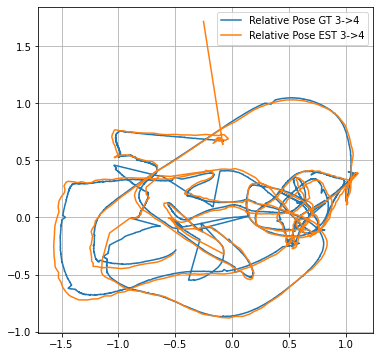

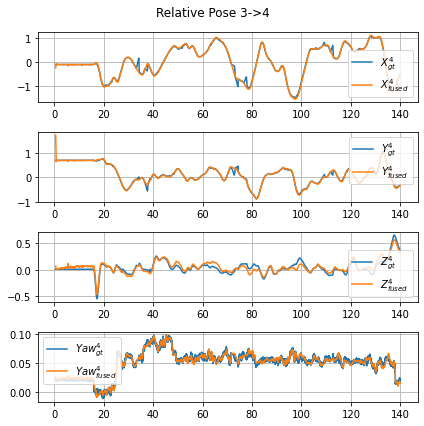

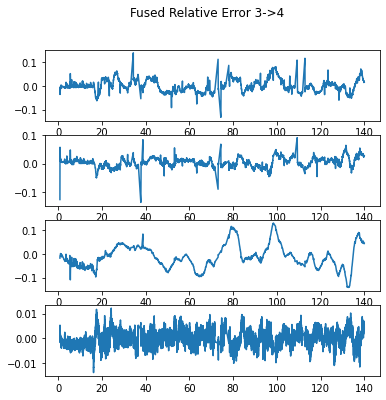

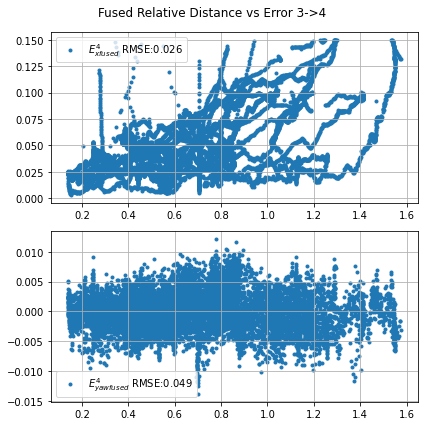

Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
3->4,"0.026,0.018,0.049",0.058,0.17°,"0.001,+0.005,-0.013",-0.01°
Avg:,,0.058,0.17°,,


VINS-Mono
dpos by 3 : [-0.34463982 -0.26208252  0.19067263]
dpos by 4 : [-0.3800563   0.46134446  0.19358404]


Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m
3by1,45.3m,0.179,4.494,1.5e-02,7.3e-03,3.2e-03,5.32e-04
4by1,43.5m,0.295,8.715,1.4e-02,1.0e-02,1.5e-02,1.59e-03
Avg.,44.4,0.237,6.60,,,,


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
3->4,"0.126,0.177,0.163",0.271,0.52°,"0.007,+0.162,-0.091",-0.04°
Avg:,,0.271,0.52°,,


In [49]:
nodes = [3, 4]
output_folder = f"/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26//outputs/d2vins-2-async/swarm{nodes[0]}"
data_folder="/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26/"
dte = 140
paths_gt, t0 = read_paths(data_folder, nodes, prefix="manual_small", suffix="-groundtruth.txt")
paths, _ = read_paths(output_folder, nodes, t0=t0)
# paths2, _ = read_paths("/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26//outputs/d2vins-2/swarm2", nodes, t0=t0)
# paths[2] = paths2[2]
print(f"Avg distance {avg_distance(paths_gt, nodes):.2f}m")
align_paths(paths, paths_gt, True)
display(plot_fused_err(nodes, paths, paths_gt, dte=dte, show=False))
display(plot_relative_pose_err(nodes[0], nodes[1:], paths, paths_gt, dte=dte, show=True, outlier_thres=0.15))
# plot_fused(nodes, paths, poses_gt=paths_gt, figsize=(10,10))

paths_vo, t0 = read_paths(data_folder, nodes, prefix="vins-mono", t0=t0)
print("VINS-Mono")
align_paths(paths_vo, paths_gt)
display(plot_fused_err(nodes, paths_vo, paths_gt, dte=dte, show=False))
display(plot_relative_pose_err(nodes[0], nodes[1:], paths_vo, paths_gt, dte=dte, show=False))


In [39]:
nodes = [1, 3, 4]
output_folder = f"/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26//outputs/d2vins-3/swarm{nodes[0]}"
data_folder="/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26/"
dte = 140
paths_gt, t0 = read_paths(data_folder, nodes, prefix="manual_small", suffix="-groundtruth.txt")
paths, _ = read_paths(output_folder, nodes, t0=t0)
print(f"Avg distance {avg_distance(paths_gt, nodes):.2f}m")
align_paths(paths, paths_gt, align_by_first=True, align_with_minize=False)
display(plot_fused_err(nodes, paths, paths_gt, dte=dte, show=False))
display(plot_relative_pose_err(nodes[0], nodes[1:], paths, paths_gt, dte=dte, show=False, outlier_thres=0.15))
# plot_fused(nodes, paths, poses_gt=paths_gt, figsize=(10,10))

paths_vo, t0 = read_paths(data_folder, nodes, prefix="vins-mono", t0=t0)
print("VINS-Mono")
align_paths(paths_vo, paths_gt)
display(plot_fused_err(nodes, paths_vo, paths_gt, dte=dte, show=False))
display(plot_relative_pose_err(1, nodes[1:], paths_vo, paths_gt, dte=dte, show=False))
# plot_fused(nodes, paths_vo, poses_gt=paths_gt, figsize=(10,10))


Avg distance 0.70m
dpos by 1 : [-0.02390696 -0.05665119 -0.00520638]


Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m
1by1,51.3m,0.171,2.267,8.5e-04,2.1e-03,7.4e-04,8.48e-04
3by1,59.1m,0.191,2.503,5.4e-03,5.5e-03,1.6e-03,2.66e-02
4by1,34.2m,0.142,2.018,1.9e-02,1.5e-02,4.5e-04,7.62e-04
Avg.,48.2,0.168,2.26,,,,


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
1->3,"0.032,0.033,0.027",0.054,0.71°,"-0.006,+0.006,+0.012",+0.19°
1->4,"0.023,0.023,0.016",0.036,0.15°,"-0.005,-0.001,+0.005",+0.03°
Avg:,,0.045,0.43°,,


VINS-Mono
dpos by 1 : [0.08023946 0.02886166 0.21836468]
dpos by 3 : [-0.34463982 -0.26208252  0.19067263]
dpos by 4 : [-0.3800563   0.46134446  0.19358404]


Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m
1by1,45.9m,0.317,4.983,1.6e-02,9.2e-03,9.7e-03,1.33e-03
3by1,45.3m,0.179,4.495,1.5e-02,7.3e-03,3.2e-03,5.32e-04
4by1,43.4m,0.295,8.715,1.4e-02,1.0e-02,1.5e-02,1.59e-03
Avg.,44.9,0.263,6.06,,,,


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
1->3,"0.186,0.101,0.130",0.248,0.75°,"-0.117,+0.042,+0.103",+0.54°
1->4,"0.172,0.218,0.101",0.296,0.70°,"-0.105,+0.202,+0.012",+0.51°
Avg:,,0.272,0.72°,,


Avg distance 0.88m
dpos by 1 : [-0.09642696 -0.07381519  0.00480162]


Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m
1by1,0.2m,0.124,0.767,3.9e-02,1.8e-02,6.6e-05,3.30e-03
2by1,0.3m,0.150,0.910,1.9e-02,1.4e-03,8.1e-04,6.54e-03
3by1,0.1m,0.135,0.847,3.7e-02,6.0e-03,2.2e-04,3.87e-03
4by1,0.6m,0.185,0.761,5.9e-03,3.7e-01,3.7e-04,3.56e-03
Avg.,0.3,0.148,0.82,,,,


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
1->2,"0.049,0.007,0.003",0.049,0.07°,"0.002,-0.005,-0.001",+0.06°
1->3,"0.054,0.025,0.003",0.059,0.16°,"0.013,-0.000,+0.001",+0.15°
1->4,"0.039,0.024,0.009",0.047,0.11°,"-0.001,+0.006,-0.009",+0.11°
Avg:,,0.052,0.11°,,


VINS-Mono
dpos by 1 : [0.08023946 0.02886166 0.21836468]
dpos by 2 : [-0.39834469 -0.02628883  0.09244166]
dpos by 3 : [-0.34463982 -0.26208252  0.19067263]
dpos by 4 : [-0.3800563   0.46134446  0.19358404]


Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m
1by1,45.9m,0.317,4.983,1.6e-02,9.2e-03,9.7e-03,1.33e-03
2by1,51.5m,0.257,1.551,2.4e-02,6.3e-03,1.5e-03,1.48e-03
3by1,45.3m,0.179,4.495,1.5e-02,7.3e-03,3.2e-03,5.32e-04
4by1,43.4m,0.295,8.715,1.4e-02,1.0e-02,1.5e-02,1.59e-03
Avg.,46.5,0.262,4.94,,,,


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
1->2,"0.356,0.133,0.142",0.406,0.81°,"-0.320,+0.053,+0.122",+0.66°
1->3,"0.186,0.101,0.130",0.248,0.75°,"-0.117,+0.042,+0.103",+0.54°
1->4,"0.172,0.218,0.101",0.296,0.70°,"-0.105,+0.202,+0.012",+0.51°
Avg:,,0.317,0.75°,,


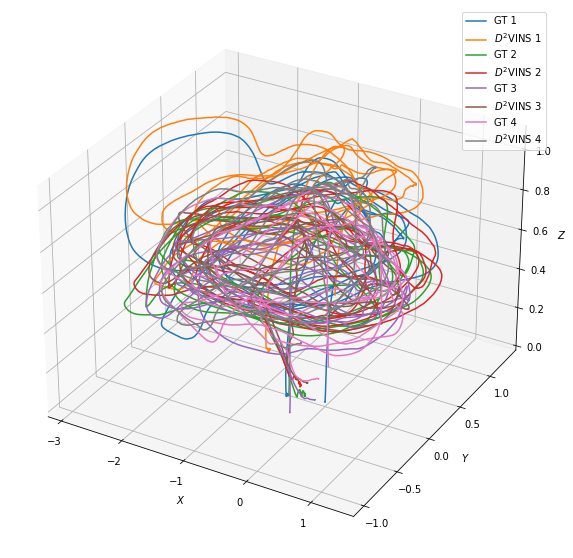

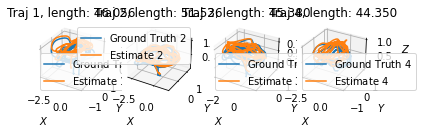

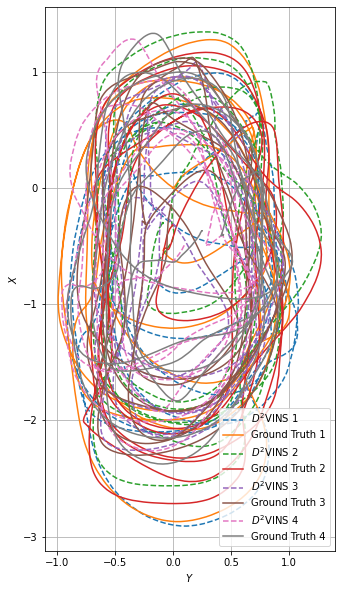

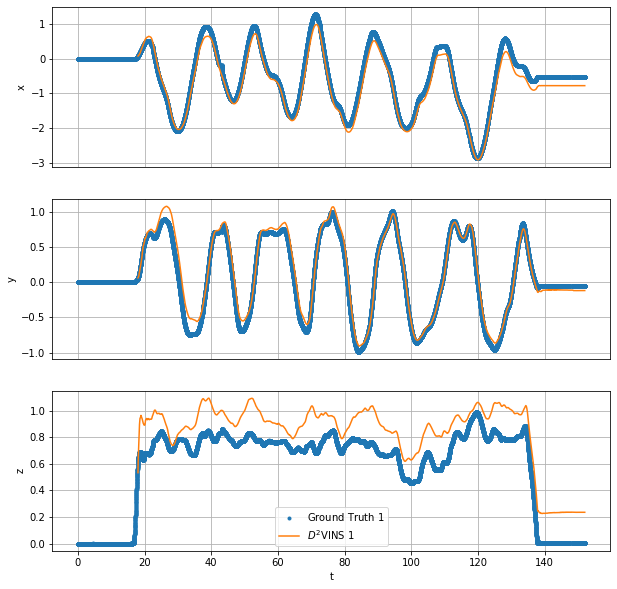

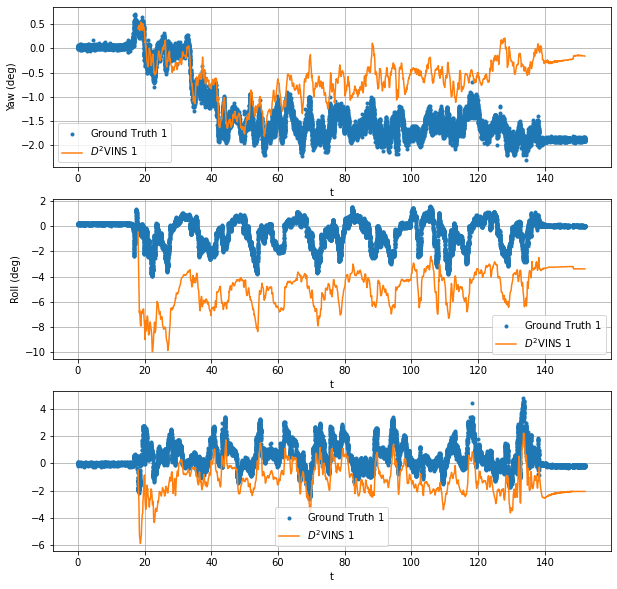

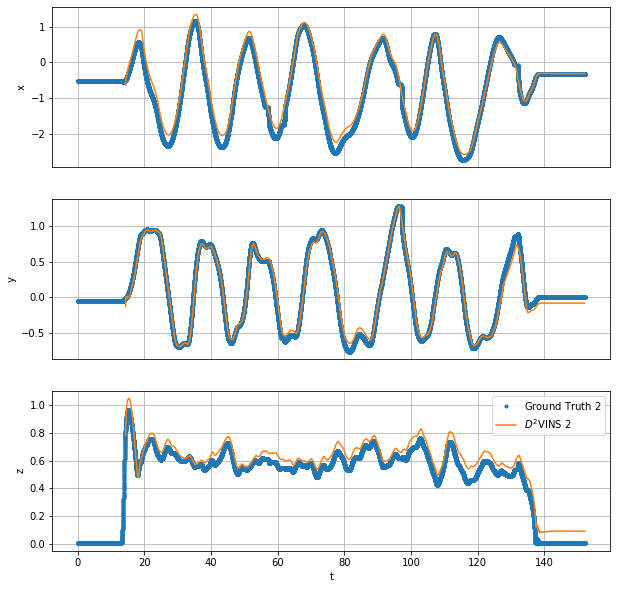

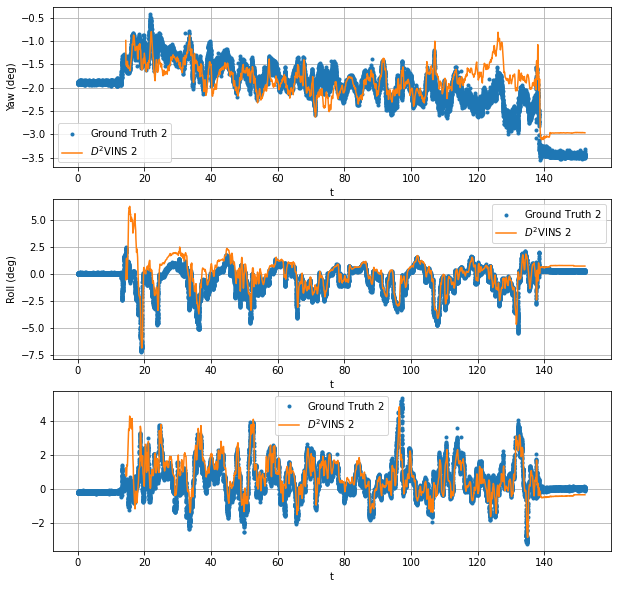

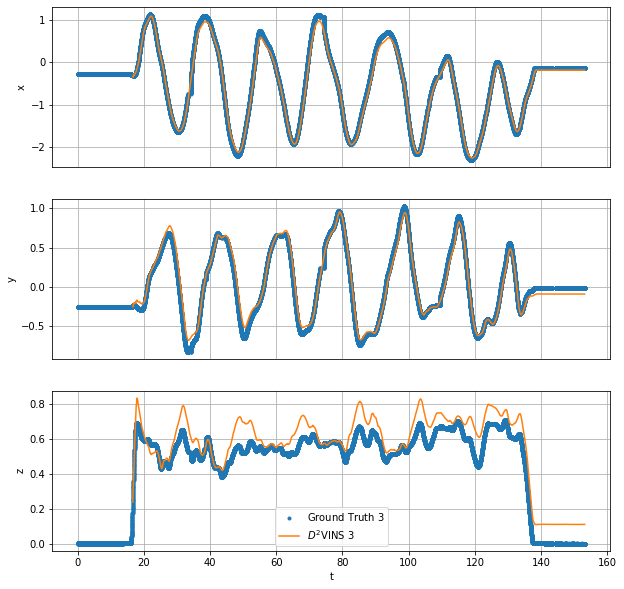

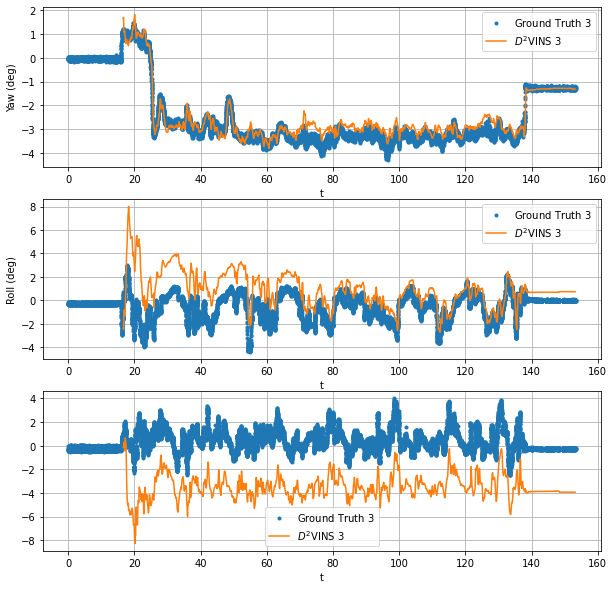

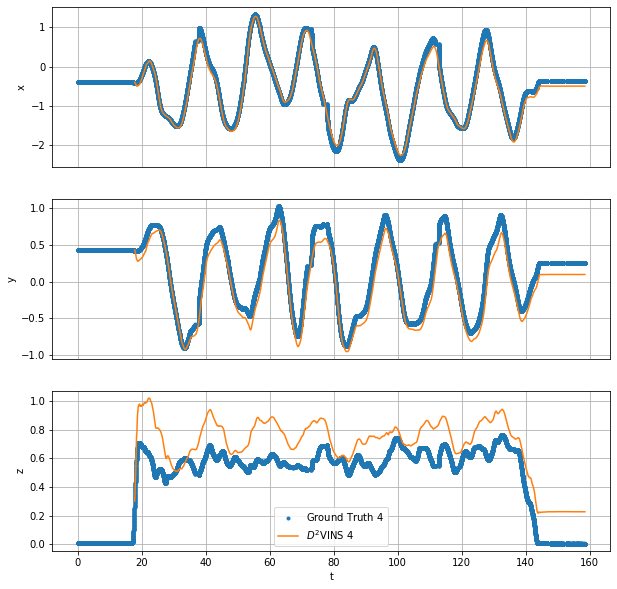

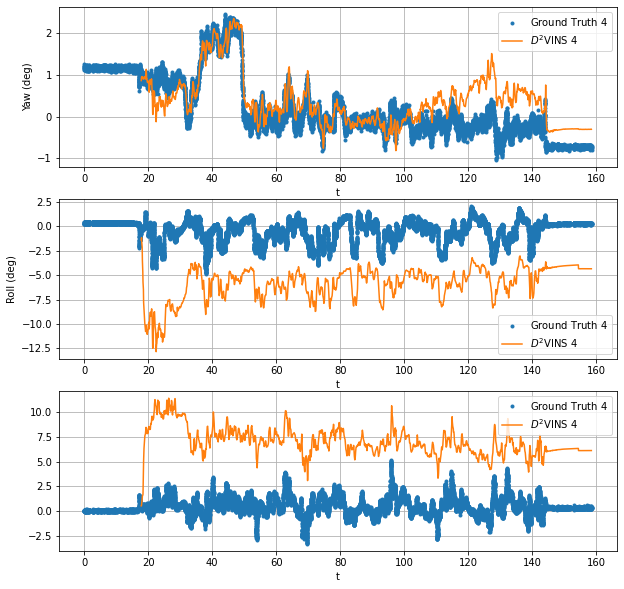

In [40]:
nodes = [1, 2, 3, 4]
output_folder = f"/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26//outputs/d2vins-4/swarm{nodes[0]}"
data_folder="/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26/"
dte = 140
paths_gt, t0 = read_paths(data_folder, nodes, prefix="manual_small", suffix="-groundtruth.txt")
paths, _ = read_paths(output_folder, nodes, t0=t0)
print(f"Avg distance {avg_distance(paths_gt, nodes):.2f}m")
align_paths(paths, paths_gt, align_by_first=True, align_with_minize=False)
display(plot_fused_err(nodes, paths, paths_gt, dte=dte, show=False))
display(plot_relative_pose_err(nodes[0], nodes[1:], paths, paths_gt, dte=dte, show=False, outlier_thres=0.2, outlier_yaw_thres=0.05))

paths_vo, t0 = read_paths(data_folder, nodes, prefix="vins-mono", t0=t0)
print("VINS-Mono")
align_paths(paths_vo, paths_gt)
display(plot_fused_err(nodes, paths_vo, paths_gt, dte=dte, show=False))
display(plot_relative_pose_err(1, nodes[1:], paths_vo, paths_gt, dte=dte, show=False))
plot_fused(nodes, paths_vo, poses_gt=paths_gt, figsize=(10,10))


In [41]:
nodes = [1, 2, 3, 4, 5]
output_folder = f"/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26//outputs/d2vins-5/swarm{nodes[0]}"
data_folder="/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26/"
dte = 115
paths_gt, t0 = read_paths(data_folder, nodes, prefix="manual_small", suffix="-groundtruth.txt")
paths, _ = read_paths(output_folder, nodes, t0=t0)
print(f"Avg distance {avg_distance(paths_gt, nodes):.2f}m")
align_paths(paths, paths_gt, align_by_first=True, align_with_minize=False)
display(plot_fused_err(nodes, paths, paths_gt, dte=dte, show=False))
display(plot_relative_pose_err(nodes[0], nodes[1:], paths, paths_gt, dte=dte, show=False, outlier_thres=0.2, outlier_yaw_thres=0.05))

paths_vo, t0 = read_paths(data_folder, nodes, prefix="vins-mono", t0=t0)
print("VINS-Mono")
align_paths(paths_vo, paths_gt)
display(plot_fused_err(nodes, paths_vo, paths_gt, dte=dte, show=False))
display(plot_relative_pose_err(1, nodes[1:], paths_vo, paths_gt, dte=dte, show=False))
# plot_fused(nodes, paths_vo, poses_gt=paths_gt, figsize=(10,10))


Avg distance 1.03m
dpos by 1 : [-0.09543596 -0.08830419 -0.02432338]


Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m
1by1,41.7m,0.166,1.939,2.7e-03,2.1e-03,3.1e-04,7.46e-04
2by1,52.5m,0.155,5.265,2.9e-03,2.0e-03,2.9e-04,1.44e-03
3by1,47.9m,0.170,4.809,2.4e-02,6.0e-03,4.1e-03,9.80e-01
4by1,43.0m,0.180,2.232,3.1e-03,3.3e-02,1.9e-03,5.02e-03
5by1,42.1m,0.148,4.359,3.4e-02,7.1e-03,9.7e-04,1.03e-02
Avg.,45.4,0.164,3.72,,,,


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
1->2,"0.045,0.055,0.024",0.075,0.53°,"-0.009,-0.030,-0.000",-0.12°
1->3,"0.045,0.042,0.029",0.069,0.50°,"-0.005,-0.003,+0.001",-0.08°
1->4,"0.035,0.043,0.022",0.059,0.37°,"-0.004,-0.012,-0.004",+0.00°
1->5,"0.052,0.065,0.028",0.088,0.68°,"-0.009,-0.033,-0.007",+0.16°
Avg:,,0.073,0.52°,,


VINS-Mono
dpos by 1 : [0.08023946 0.02886166 0.21836468]
dpos by 2 : [-0.39834469 -0.02628883  0.09244166]
dpos by 3 : [-0.34463982 -0.26208252  0.19067263]
dpos by 4 : [-0.3800563   0.46134446  0.19358404]
dpos by 5 : [-0.88032621 -0.01307539  0.28622256]


Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m
1by1,37.2m,0.311,5.086,1.6e-02,1.0e-02,1.0e-02,1.39e-03
2by1,43.6m,0.273,1.614,2.4e-02,4.3e-03,1.7e-03,1.15e-03
3by1,36.9m,0.181,4.660,1.7e-02,6.0e-03,3.0e-03,6.25e-04
4by1,34.8m,0.293,8.984,1.3e-02,1.3e-02,1.9e-02,1.41e-03
5by1,28.2m,0.359,4.074,8.5e-03,5.6e-03,1.2e-02,1.65e-03
Avg.,36.1,0.284,4.88,,,,


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
1->2,"0.381,0.134,0.148",0.430,0.80°,"-0.352,+0.047,+0.129",+0.66°
1->3,"0.168,0.101,0.137",0.238,0.57°,"-0.093,+0.043,+0.114",+0.38°
1->4,"0.181,0.221,0.108",0.306,0.72°,"-0.104,+0.206,+0.008",+0.53°
1->5,"0.228,0.225,0.164",0.360,0.48°,"-0.098,+0.159,-0.142",+0.17°
Avg:,,0.334,0.64°,,


Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m
1by1,100.6m,0.139,1.454,9.5e-04,1.4e-03,9.2e-05,1.16e-03
Avg.,100.6,0.139,1.45,,,,


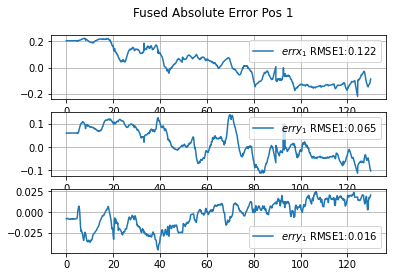

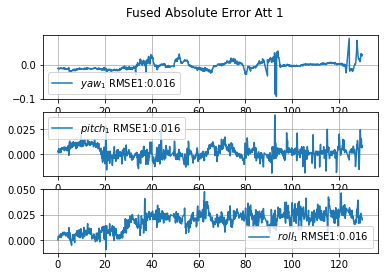

In [28]:
nodes = [1]
output_folder = f"/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26/outputs/d2vins-calib/swarm{nodes[0]}"
dte = 130
paths_gt = {}
paths, t0 = read_paths(output_folder, nodes)
paths_gt[1], t0 = read_path_from_csv(f"/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26/manual_vo_test-groundtruth.txt", t0)
align_path_by_minimize(paths[1], paths_gt[1])
display(plot_fused_err(nodes, paths, paths_gt, dte=dte, show=True, outlier_thres=0.25))

# print("VINS-Mono")
# paths_vo, t0 = read_paths(data_folder, nodes, prefix="vins-mono", t0=t0)
# align_paths(paths_vo, paths_gt)
# display(plot_fused_err(nodes, paths_vo, paths_gt, dte=dte, show=False))
# plot_fused(nodes, paths_vo, poses_gt=paths_gt, figsize=(10,10))

In [82]:
#Find the nearest pair of datasets
paths_gt = {}
t0 = None
for i in range(1, 7):
    paths_gt[i], t0 = read_path_from_csv(f"/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26/manual_small_{i}-groundtruth.txt", t0)
output_table = [i for i in range(0, 7)]
output_table[0] = "Drone"

for i in range(1, 7):
    for j in range(i+1, 7):
        t = find_common_times(paths_gt[i].t, paths_gt[j].t)
        ate_pos = ATE_POS(paths_gt[i].pos_func(t), paths_gt[j].pos_func(t))
        print(f"i={i}, j={j} ate_pos={ate_pos}")


i=1, j=2 ate_pos=1.1153099810600295
i=1, j=3 ate_pos=0.8931560542021817
i=1, j=4 ate_pos=0.7257888430433389
i=1, j=5 ate_pos=1.5955209244068225
i=1, j=6 ate_pos=1.3623341151196056
i=2, j=3 ate_pos=1.3742678644874933
i=2, j=4 ate_pos=1.1820894510636852
i=2, j=5 ate_pos=1.3444408968806631
i=2, j=6 ate_pos=1.6470310977160176
i=3, j=4 ate_pos=0.746267620911219
i=3, j=5 ate_pos=1.4710749098186946
i=3, j=6 ate_pos=1.034638980263036
i=4, j=5 ate_pos=1.5108911397472125
i=4, j=6 ate_pos=1.2008541200936083
i=5, j=6 ate_pos=1.428621818209765
